In [ ]:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://github.com/usm-cos422-522/courseMaterials/blob/main/Labs/titanic-workflow.ipynb)

# <center> Titanic Survival Prediction:  Workflow </center>

The objective of this notebook is to show some of the essential steps of a workflow for building predictive models. The notebook provides a few examples of each step. The workflow includes:
1. **Problem Definition**:  A clear definition of the problem enables us to identify the appropriate data to gather and technique(s) to use in order to solve the problem. For many problems this many require background reading, discussion with domain experts, and layered problem specification. 
2. **Data Gathering**: We have to know which data to use, where to gather them, and how to make them useful to solve our problem. In many cases, data from multiple sources can provide deeper insights. 
3. **Data Wrangling**: Raw data are generally incomplete, inconsistent, and contain many errors. Thus, we need to prepare the data for further processing. Data wrangling is the process of cleaning, structuring, and enriching raw data into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics.
4. **Exploratory Data Analysis**: Exploratory data analysis (EDA) is an approach of performing initial investigations on our data. EDA normally has descriptive nature and uses graphical statistics to discover patterns, to identify anomalies, to test hypothesis, and to check assumptions regarding our data. 
5. **Data Modelling**:  Data modelling involves selecting and optiming the machine learning models that generate the best predictive performance based on the data we have. 
6. **Prediction**: Once we have developed the best predictive model, we can deploy it to make predictions.



<a id='section 1.0.'></a>

# 1.0. Problem Definition
 On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others.

In this challenge, we are to perform analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Before moving to the next section, we need to import all packages required to do the analysis by calling the following:

<a id='section 2.0.'></a>

# 2.0. Data Gathering and Import


<a id='section 2.1.'></a>

## 2.1. Gathering and Importing Data
The train and test dataset originated in Kaggle from this [link](https://www.kaggle.com/c/titanic/data). We will import a copy of the datasets from the book's Github site:

In [ ]:
# Importing data analysis packages
import pandas as pd
import numpy as np

# Importing data visualization packages
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="whitegrid")

# Importing model selection packages
from sklearn.model_selection import StratifiedShuffleSplit, cross_validate, GridSearchCV, cross_val_score

# Importing machine learning packages
from sklearn.linear_model import LogisticRegression

# Miscellaneous
import time
import warnings
warnings.filterwarnings('ignore')
pd.set_option('max_colwidth',80)

In [32]:
# Importing datasets
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/train.csv'
df_train = pd.read_csv(url)


<a id='section 2.2.'></a>

## 2.2. Exploring Data Structure and Features
Before performing data analysis, we often need to know the structure of our data. Therefore, we perform the following:
- Viewing a small part of our datasets
- Viewing data shape
- Describing the features contained in the datasets

<a id='Viewing a small part of the dataset'></a>

### Viewing a small part of the dataset 

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


<a id='Viewing data shape'></a>

### Viewing data shape

In [4]:
df_train.shape

(891, 12)

We can observe that the training dataset has 891 entries and 12 columns 

<a id='Describing features'></a>

### Describing features
Each column gives certain information about a Titanic passenger feature. The description about each feature is given in this [link](https://www.kaggle.com/c/titanic/data). 

In [5]:
feat_desc = pd.DataFrame({'Description': ['Passenger ID',
                                          'Whether the passenger was survived or not',
                                          'The ticket class that the passenger bought',
                                          'The passenger name',
                                          'The gender of the passenger',
                                          'The age of the passenger',
                                          'The number of siblings/spouses that the passenger has aboard the Titanic',
                                          'The number of parents/children that the passenger has aboard the Titanic',
                                          'The ticket number of the passenger',
                                          'The ticket fare that the passenger paid',
                                          'The cabin number that the passenger boarded',
                                          'The passenger port of embarkation'], 
                          'Values': [df_train[i].unique() for i in df_train.columns],
                          'Number of unique values': [len(df_train[i].unique()) for i in df_train.columns]}, 
                          index = df_train.columns)

feat_desc

,Description,Values,Number of unique values
PassengerId,Passenger ID,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, ...",891
Survived,Whether the passenger was survived or not,"[0, 1]",2
Pclass,The ticket class that the passenger bought,"[3, 1, 2]",3
Name,The passenger name,"[Braund, Mr. Owen Harris, Cumings, Mrs. John Bradley (Florence Briggs Thayer...",891
Sex,The gender of the passenger,"[male, female]",2
Age,The age of the passenger,"[22.0, 38.0, 26.0, 35.0, nan, 54.0, 2.0, 27.0, 14.0, 4.0, 58.0, 20.0, 39.0, ...",89
SibSp,The number of siblings/spouses that the passenger has aboard the Titanic,"[1, 0, 3, 4, 2, 5, 8]",7
Parch,The number of parents/children that the passenger has aboard the Titanic,"[0, 1, 2, 5, 3, 4, 6]",7
Ticket,The ticket number of the passenger,"[A/5 21171, PC 17599, STON/O2. 3101282, 113803, 373450, 330877, 17463, 34990...",681
Fare,The ticket fare that the passenger paid,"[7.25, 71.2833, 7.925, 53.1, 8.05, 8.4583, 51.8625, 21.075, 11.1333, 30.0708...",248


From the table above, we can observe the following:
- These features can be divided into four categories:
  * Nominal categorical feature: feature that has two or more categories, but there is no intrinsic ordering to the categories. In the dataset, this includes ***Survived***, ***Name***, ***Sex***, ***Ticket***, ***Cabin***. 
  * Ordinal categorical feature: this feature has similar characteristics with nominal categorical feature. The difference is it has a clear ordering of the categories. In the dataset, this includes ***Pclass*** and ***Embarked***. 
  * Integer numerical feature: feature that must take an integer value. In the dataset, this includes ***SibSp*** and ***Parch***.
  * Continuous numerical feature: feature that can take on infinitely many, uncountable values. In the dataset, this includes ***Age*** and ***Fare***.
- ***Survived*** is the dependent/outcome feature of this problem set. It contains binary data with value 0 (i.e., not survived) and 1 (i.e., survived). Other features are the potential independent/predictor features.
- ***Pclass*** contains three values: *1*, *2*, and *3*. *1* indicates 1st class ticket, *2* indicates 2nd class ticket, and *3* indicates 3rd class ticket.
- ***Embarked*** feature contains three values: *S*, *C*, and *Q*. *S* indicates Southampton, *C* indicates Cherbourg, and *Q* indicates Queenstown. ***Embarked*** is considered as a ordinal categorical feature because Titanic embarked these three ports in a sequence. It went to Southampton, then Cherbourg, and finally Queenstown. 
- ***PassengerId*** feature contains unique identifier for each passenger. This feature does not have an impact to the output feature. However, it will be very useful to give each passenger a unique identifier.   

In [6]:
# Setting 'PassengerId' as the index of training and test dataset
df_train.set_index('PassengerId', inplace=True)


<a id='section 3.0.'></a>

# 3.0. Data Wrangling
Data wrangling is the process of cleaning, structuring, and enriching raw data into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes, such as analytics. To prepare the dataset, we use the 4C's framework, i.e., **Correcting**, **Completing**, **Creating**, and **Converting**:
- Correcting includes:
  * 3.1. Rectifying any abnormal, inaccurate, or non-acceptable values](#section 3.1.)

- Completing includes:
  * 3.2. Handling missing data
- Creating includes:
  * 3.3. Creating new features from existing features (feature engineering)
- Converting includes:
  * 3.4. Converting data types
  * 3.5. Removing features that do not contribute to the analysis

<a id='section 3.1.'></a>

## 3.1. Rectifying any abnormal, inaccurate, or non-acceptable values
Abnormal, inaccurate, or non-acceptable values in our dataset can distort predictions and affect the accuracy if you don’t detect and handle them. An example of abnormal value is to find a passenger to be 1000 years old, which is not possible. We can use univariate distribution of each feature to identify any abnormal, inaccurate, or non-acceptable values. 

### Univariate distributions of numerical features

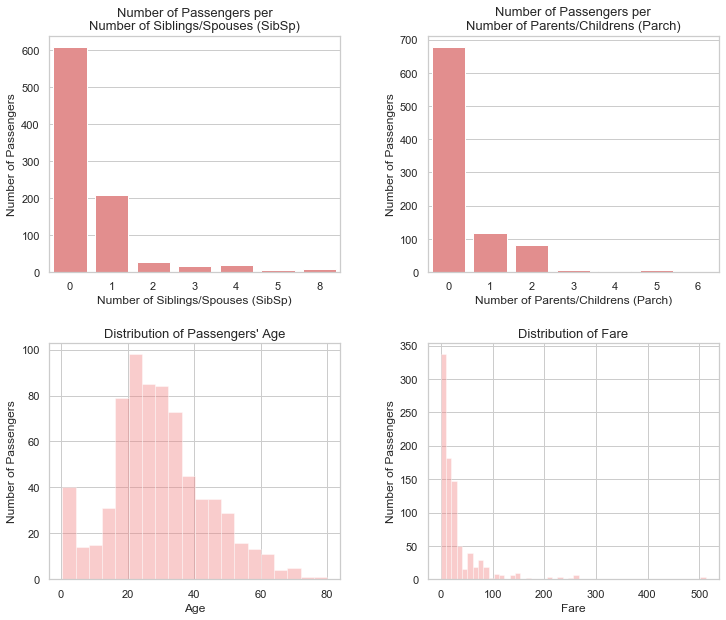

In [8]:
plt.figure(figsize=(12,10))

# Creating univariate distribution of 'SibSp' feature
plt.subplot(221)
sns.countplot(df_train['SibSp'], color='lightcoral')
plt.ylabel('Number of Passengers')
plt.xlabel('Number of Siblings/Spouses (SibSp)')
plt.title('Number of Passengers per\nNumber of Siblings/Spouses (SibSp)', size=13)

# Creating univariate distribution of 'Parch' feature
plt.subplot(222)
sns.countplot(df_train['Parch'], color='lightcoral')
plt.ylabel('Number of Passengers')
plt.xlabel('Number of Parents/Childrens (Parch)')
plt.title('Number of Passengers per\nNumber of Parents/Childrens (Parch)', size=13)

# Creating univariate distribution of 'Age' feature
plt.subplot(223)
sns.distplot(df_train['Age'].dropna(), color='lightcoral', kde=False, norm_hist=False)
plt.ylabel('Number of Passengers')
plt.xlabel('Age')
plt.title('Distribution of Passengers\' Age', size=13)

# Creating univariate distribution of 'Fare' feature
plt.subplot(224)
sns.distplot(df_train['Fare'].dropna(), color='lightcoral', kde=False, norm_hist=False)
plt.ylabel('Number of Passengers')
plt.xlabel('Fare')
plt.title('Distribution of Fare', size=13)

plt.subplots_adjust(hspace = 0.3, wspace = 0.3)

plt.show()

Based on the charts above, we can observe the following:
- The distribution of ***SibSp*** feature is skewed with most passengers did not have any siblings or spouses aboard the Titanic. Only a few passengers had siblings/spouses more than one. The value range is still acceptable and there seemes to be no abnormal, inaccurate, or non-acceptable values. 
- The distribution of ***Parch*** feature is skewed with most passengers did not have any parents or childrens aboard the Titanic. Only a few passengers had parents/children more than one. The value range is still acceptable and there seemes to be no abnormal, inaccurate, or non-acceptable values. 
- The distribution of ***Age*** resembles a normal distribution. Most passengers were between 20 and 40 years old. The maximum age of a passenger is 80 years old. The value range is still acceptable and there seemes to be no abnormal, inaccurate, or non-acceptable values. 
- The distribution of ***Fare*** feature is skewed with most passengers paid fare between £0 to £100. The maximum fare paid by a passenger was £512. It is stated in this [article](https://www.quora.com/What-were-the-ticket-prices-to-board-the-Titanic) that the cost of tickets to board the Titanic were:
    - First Class (parlor suite) — £870
    - First Class (berth)— £30
    - Second Class — £12
    - Third Class — £3 to £8
- Based on the above information, the value range of ***Fare*** feature is still acceptable.

Based on these observations, there seems to be no abnormal values from these numerical features. Therefore, no value correction is necessary.

<a id='section 3.2.'></a>

<a id='section 3.3.'></a>

## 3.2. Handling missing data
Most machine learning algorithms cannot handle missing values. Therefore, it is important to identify feature(s) that contain missing values in order for us to fix them before performing data modelling. 

### Identifying missing data in the training dataset

We call the following to identify missing data in the training dataset:

In [9]:
# Identifying missing data in the training and test dataset
pd.DataFrame({'Number of Missing Values (Training)': df_train.isna().sum(), 
              '% of Missing Values (Training)': (df_train.isna().sum()/df_train.shape[0] * 100).round(2)})

,Number of Missing Values (Training),% of Missing Values (Training)
PassengerId,0,0.00
Survived,0,0.00
Pclass,0,0.00
Name,0,0.00
Sex,0,0.00
Age,177,19.87
SibSp,0,0.00
Parch,0,0.00
Ticket,0,0.00
Fare,0,0.00


Based on the observation, ***Age***, ***Cabin***, ***Embarked***, and ***Fare*** contain some missing values.

After we identfy features with missing values, we need to do something to handle these missing values. Alvira Swalin writes a comprehensive post about how to handle missing data in this [link](https://towardsdatascience.com/how-to-handle-missing-data-8646b18db0d4). 

We decide to impute missing entries in ***Age*** feature. 

<a id='Imputing missing values in Cabin feature'></a>

### Imputing missing values in *Age* feature
We decide to impute the mean age wherever NaN value exists. Passengers who have missing values in ***Age*** feature will take on the mean age.  

In [10]:
df_train['Age'].fillna(df_train['Age'].median(),inplace=True)


We leave the resolution of remaining variables with missing values as an exercise

## 3.3. Creating new features from existing features

We can use existing features to create new features to determine if they contribute to predict our outcome. For this dataset, we will create a new isAlone variable from existing data. 

<a id='Title'></a>

### Creating *SibSp+Parch* feature
An individual is alone if they have no siblings/spouses (SibSp) and they have no parents or children on the ship with them. So we add the number of siblings/spouses (***SibSp***) and the number of parents/children (***Parch***) and make it a feature named ***SibSp+Parch***.  

In [11]:
# Creating 'SibSp+Parch' feature
df_train['SibSp+Parch'] = df_train['SibSp'] + df_train['Parch'] 


<a id='IsAlone'></a>

### Creating *IsAlone* feature
***IsAlone*** feature determines whether a passenger had siblings/spouses and/or parents/children. If a passenger did not have any siblings/spouses and/or parents/children, ***IsAlone*** = 1. And if a passenger had any siblings/spouses and/or parents/children, ***IsAlone*** = 0. 

In [12]:
# Creating 'IsAlone' feature
df_train['IsAlone'] = df_train['SibSp+Parch'].map(lambda x: 1 if x == 0 else 0)


<a id='FamilySurvival'></a>

<a id='section 3.5.'></a>

## 3.4. Converting data types
Most machine learning algorithms require all features to be converted into some numeric representations that can be understood by these algorithms. Categorical features cannot be processed directly by the algorithms and conversions on these features shall be done before subsequent data processing. Therefore, knowing the data type of all features helps us in deciding which feature(s) need conversion to other data type. We call the following to see the data type pf each feature in the dataset:

In [13]:
# Viewing data type of each feature in the dataset
df_train.dtypes.to_frame(name='Data type')

,Data type
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


We can observe that seven features have integer data type, i.e., ***Survived***, ***Pclass***, ***Age***, ***SibSp***, ***Parch***, ***SibSp+Parch***, and ***IsAlone***. Two features have float data type, i.e., ***FamilySurvival*** and ***Fare***. And six features have object (string) data type, i.e., ***Name***, ***Sex***, ***Ticket***, ***Cabin***, ***Embarked***, and ***Title***.

Based on these observations, we need to convert features that have object (string) data type into numerical data type. 
- ***Name*** and ***Ticket*** feature will be removed because they will not be used anymore in the subsequent analysis.
- For ***Sex*** feature, we will replace the values with binary numbers. *male* is replaced by 1 and *female* by 0. 
- ***Embarked*** feature is considered as a ordinal categorical feature because Titanic embarked these three ports in a sequence. It went to Southampton, then Cherbourg, and finally Queenstown. Thus, *S* (representing Southampton) is replaced by 0, *C* (representing Cherbourg) by 1, and *Q* (representing Queenstown) by 2. 
- For ***Title*** and ***Cabin*** feature, the conversion is a bit complex because they comprise of several categories and have no clear ordering of categories. We will think about how to convert these features after performing [exploratory data analysis](#section 4.0.).

**Converting *Sex* feature data type**

In [14]:
# Converting 'Sex' feature data type
df_train.replace({'male': 1, 'female': 0}, inplace=True)

<a id='section 3.6.'></a>

## 3.5. Removing features that do not contribute to the analysis
***Name*** and ***Ticket*** feature will be removed because they will not be used anymore in the subsequent analysis. Thus, we drop them for our datasets by calling the following:

In [15]:
# Dropping only 'Name' and 'Ticket' feature when I convert the other ordinal values 
# df_train.drop(columns=['Name', 'Ticket'], inplace=True)

# For now, I drop all ordinal columns except for Sex
df_train.drop(columns=['Name', 'Ticket','Fare', 'Embarked', 'Cabin'], inplace=True)


In [16]:
df_train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,SibSp+Parch,IsAlone
0,1,0,3,1,22.0,1,0,1,0
1,2,1,1,0,38.0,1,0,1,0
2,3,1,3,0,26.0,0,0,0,1
3,4,1,1,0,35.0,1,0,1,0
4,5,0,3,1,35.0,0,0,0,1


<a id='section 4.0.'></a>

# 4.0. Exploratory Data Analysis
Exploratory data analysis (EDA) is an approach of performing initial investigations on our data. EDA normally has descriptive nature and uses graphical statistics to discover patterns, to identify anomalies, to test hypothesis, and to check assumptions regarding our data. In this section, we will perform EDA for each feature in our dataset. The focus is to find patterns and correlations between the independent features and the output feature (i.e., ***Survived***). Some feature engineering are performed based on EDA. 
- [4.1. Ticket Class (***Pclass***) EDA](#section 4.1.)
- [4.2. Gender (***Sex***) EDA](#section 4.2.)
- [4.4. Passenger Is Alone (***IsAlone***) EDA](#section 4.4.)
- [4.6. Passenger's Age (***Age***) EDA](#section 4.6.)
- [4.9. Number of  Siblings/Spouses/Parents/Children (***SibSp+Parch***) EDA](#section 4.9.)
- [4.12.Correlation Among Features](#section 4.12.)

<a id='section 4.1.'></a>

## 4.1. Ticket Class (*Pclass*) EDA
For ticket class feature, let's visualize the following:
- Ticket class vs probability of survival (***Survived***)
- Ticket class and gender (***Sex***) vs probability of survival

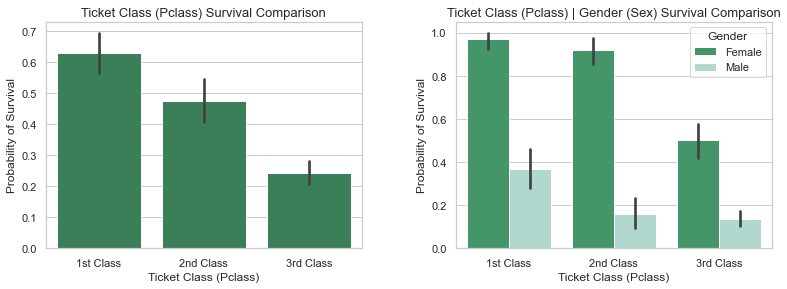

In [137]:
plt.figure(figsize=(13,10))

# Creating a bar chart of ticket class (Pclass) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='Pclass', y='Survived', data=df_train, color='seagreen')
plt.ylabel('Probability of Survival')
plt.xlabel('Ticket Class (Pclass)')
ax1.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
plt.title('Ticket Class (Pclass) Survival Comparison', size=13)

# Creating a bar chart of ticket class (Pclass) and gender (Sex) vs probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='Pclass', y='Survived', hue='Sex', data=df_train, palette='BuGn_r')
plt.ylabel('Probability of Survival')
plt.xlabel('Ticket Class (Pclass)')
ax2.set_xticklabels(['1st Class', '2nd Class', '3rd Class'])
handles, _ = g2.get_legend_handles_labels()
ax2.legend(handles, ['Female', 'Male'], title='Gender')
plt.title('Ticket Class (Pclass) | Gender (Sex) Survival Comparison', size=13)


plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

From the charts above, we can observe the following:
- Passengers with higher ticket class had higher probability of survival than passengers with lower ticket class. 
- Female passengers in the 1st and 2nd class had a considerably higher chance of survival (more than 85%) than female passengers in the 3rd class (only about 50%). 
- Male passengers in the 1st and 2nd class had a considerably higher chance of survival (~35%) than male passengers in the 2nd and 3rd class. Male passengers in the 2nd and 3rd class had only probability of survival less than 20%. 

Based on these observations, it seems that the rescue was prioritized for passengers who had higher ticket class. We can infer that ***Pclass*** is an important feature to predict survival of passengers. 

<a id='section 4.2.'></a>

## 4.2. Gender (*Sex*) EDA
For gender feature, let's visualize the following:
- Gender vs probability of survival (***Survived***)
- Gender and ticket class (***Pclass***) vs probability of survival

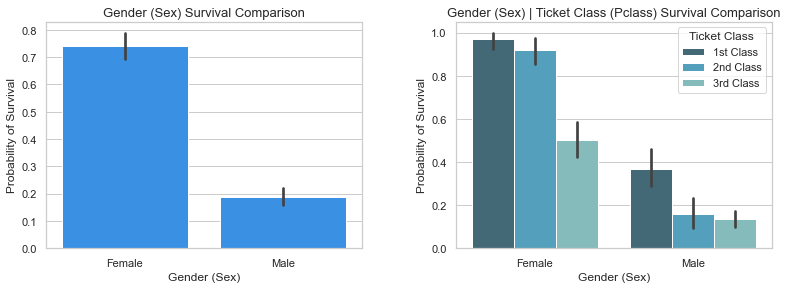

In [138]:
plt.figure(figsize=(13,10))

# Creating a bar chart of gender (Sex) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='Sex', y='Survived', data=df_train, color='dodgerblue')
plt.ylabel('Probability of Survival')
plt.xlabel('Gender (Sex)')
ax1.set_xticklabels(['Female', 'Male'])
plt.title('Gender (Sex) Survival Comparison', size=13)

# Creating a bar chart of gender (Sex) and ticket class (Pclass) vs probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df_train, palette='GnBu_d')
plt.ylabel('Probability of Survival')
plt.xlabel('Gender (Sex)')
ax2.set_xticklabels(['Female', 'Male'])
handles, _ = g2.get_legend_handles_labels()
ax2.legend(handles, ['1st Class', '2nd Class', '3rd Class'], title='Ticket Class')
plt.title('Gender (Sex) | Ticket Class (Pclass) Survival Comparison', size=13)


plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

From the charts above, we can observe the following:
- Female passengers had significantly higher chance of survival (more than 70%) than male passengers (~20%). 
- Female passengers in the 1st and 2nd class had a considerably higher chance of survival (more than 85%) than female passengers in the 3rd class (only about 50%). Meanwhile, male passengers in the 1st class had considerably higher chance of survival (about 36%) than male passengers in the 2nd and 3rd class. 

Based on these observations, it seems that the rescue was prioritized for female passengers. We can infer that ***Sex*** is an important feature to predict survival of passengers.

<a id='section 4.3.'></a>

<a id='section 4.4.'></a>

## 4.3. Passenger Is Alone (*IsAlone*) EDA
For passenger is alone feature, let's visualize the following:
- Passenger is alone vs probability of survival (***Survived***)
- Passenger is alone and ticket class (***Pclass***) vs probability of survival
- Passenger is alone and gender (***Sex***) vs probability of survival
- Passenger is alone and port of embarkation (***Embarked***) vs probability of survival

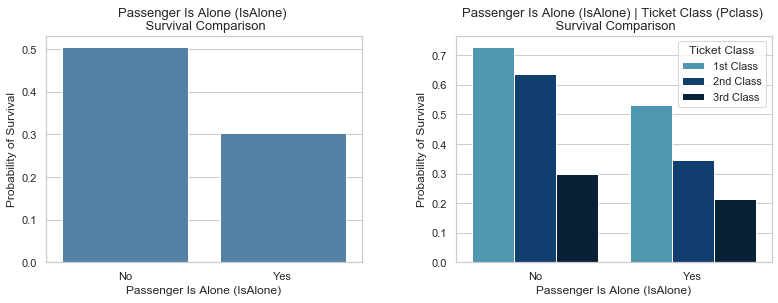

In [17]:
plt.figure(figsize=(13,10))

# Creating a bar chart of passenger is alone (IsAlone) vs probability of survival (Survived)
ax1 = plt.subplot(221)
g1 = sns.barplot(x='IsAlone', y='Survived', data=df_train, color='steelblue', ci = None)
plt.ylabel('Probability of Survival')
plt.xlabel('Passenger Is Alone (IsAlone)')
ax1.set_xticklabels(['No', 'Yes'])
plt.title('Passenger Is Alone (IsAlone) \n Survival Comparison', size=13)

# Creating a bar chart of passenger is alone (IsAlone) and ticket class (Pclass) 
# vs probability of survival (Survived)
ax2 = plt.subplot(222)
g2 = sns.barplot(x='IsAlone', y='Survived', hue='Pclass', data=df_train, palette='ocean_r', ci = None)
plt.ylabel('Probability of Survival')
plt.xlabel('Passenger Is Alone (IsAlone)')
ax2.set_xticklabels(['No', 'Yes'])
handles, _ = g2.get_legend_handles_labels()
ax2.legend(handles, ['1st Class', '2nd Class', '3rd Class'], title='Ticket Class')
plt.title('Passenger Is Alone (IsAlone) | Ticket Class (Pclass) \n Survival Comparison', size=13)

plt.subplots_adjust(hspace = 0.4, wspace = 0.3)

plt.show()

From the charts above, we can observe the following:
- Passengers who were travelling alone were less likely to survive than passengers who were travelling with someone else. 
- 1st class passengers were more likely to survive than 2nd class passengers, and 2nd class passengers were more likely to survive than 3rd class passengers. This applies for both passengers who were travelling alone and with someone else. 
- Female passengers were more likely to survive than male passengers. This applies for both passengers who were travelling alone and with someone else. 
- Passengers embarked from Southampton had higher survival chance than passengers embarked from Cherbourg and Queenstown. This applies for both passengers who were travelling alone and with someone else. 

<a id='section 4.5.'></a>

<a id='section 4.7.'></a>

## 4.12. Correlation Among Features
Let's visualize the correlation among features by using a heatmap.

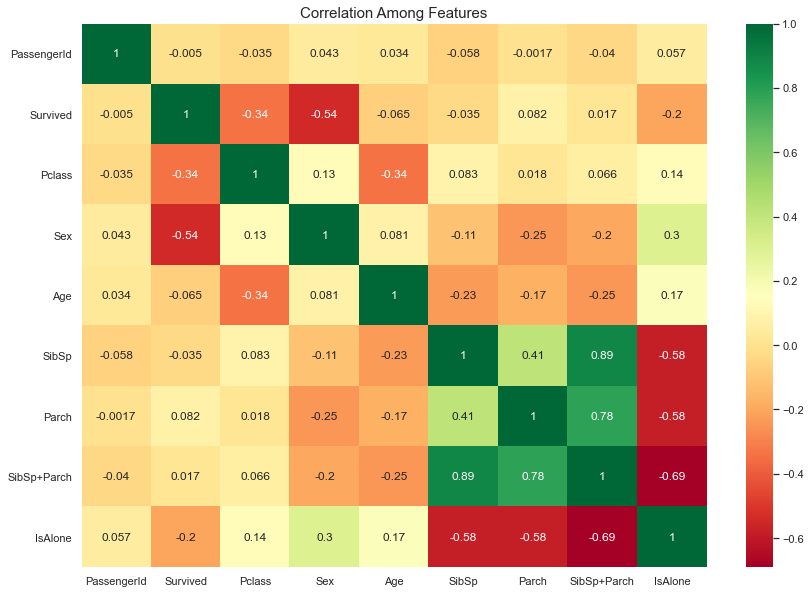

In [56]:
plt.figure(figsize=(14,10))

# Creating a heatmap of correlation among features
sns.heatmap(df_train.corr(), cmap='RdYlGn', annot=True)
plt.title('Correlation Among Features', size=15)

plt.show()

We can observe that ***Pclass***, ***Sex***, and ***isAlone*** are some features that have a pretty high correlation with ***Survived***. Some multicollinearities (i.e., collinearity among independent features) are detected, such as ***isAlone*** and ***Sex***. Multicollinear features cause redundancies as they contain almost the same information. This increase training time. We should try to eliminate redundant features as it reduces training time. But for now, we will permit multicollinearities in our dataset. 

<a id='section 5.0.'></a>

# 5.0. Data Modelling
There is no machine learning algorithm that works best in all situations. So, the best approach is to generate a high performance model is by trying multiple algorithms, optimizing them, and comparing them for your specific scenario. In this section, we perform the following:

- [**5.1. Simple Modelling**](#section 5.1.): We develop a decision rule based on a few of the characteristics of an individual. 
- [**5.2. Logistic Regression**](#section 5.2.): We use a logistic regression algorithm to predict outcome based on the characteritics of an individual.  

In this problem, we use **accuracy** as the measure of model's performance. Accuracy is the fraction of predictions our model got right. 

<a id='section 5.1.'></a>

## 5.1. Simple Modelling
We try two modeling techniques. One very simple approach predict survival if the individual is female or if they are a male in first class. s based on them and the dataset we have. Then, cross-validation is performed to estimate the accuracy of the machine learning models. You can read more about cross-validation in this [article](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f).

We seperate the dependent (y) and independent variables(X). In addition, we create a validation set to experiment with different algorithms

In [18]:
y=df_train['Survived']
X=df_train.drop('Survived',axis=1)
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.20, random_state=42)

In [19]:
def predSurvival(Sex, Pclass, isAlone):
    if Sex == 0:
        survive = 1
    elif Sex == 1 and Pclass == 1:
        survive = 1
    else:
        survive = 0
    return survive
       

In [20]:
prediction = X_validation.apply(lambda x: predSurvival(x['Sex'], x['Pclass'], x['IsAlone']), axis=1)

In [21]:
1 - sum(abs(prediction-y_validation)/X_validation.shape[0])

0.7653631284916202

With our simple decision rule (predict survival if female or first class), we can get approximately 76% accuracy. Experimenting with different validation sets (cross-validation) would improve our understanding of how robust this measure is. 

<a id='section 5.2.'></a>

## Logistic Regression
Logistic regression is used to explain the relationship between one dependent binary variable and one or more independent variables. We use cross-validation is performed to estimate the accuracy of the machine learning models. You can read more about cross-validation in this [article](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f).


In [22]:
logReg=LogisticRegression(solver='liblinear')
logReg.fit(X_train,y_train)
#pred_train=logReg.predict(train_y)
score=cross_val_score(logReg,X_train,y_train,cv=5)
print("Score:",score)
#print("Confusion_matrix:",confusion_matrix(train_y,pred_train))
acc_log = round(logReg.score(X_train,y_train) * 100, 2)
acc_log

Score: [0.82517483 0.81818182 0.78873239 0.76056338 0.83098592]


80.34

Now let's test out the model on the validation set. 

In [23]:
prediction=logReg.predict(X_validation)

In [24]:
1 - sum(abs(prediction-y_validation)/X_validation.shape[0])

0.793296089385475

<a id='section 6.0.'></a>

# 6.0. Prediction
We now make our predictions on the test dataset. We do not know the survival status of these individuals, but we use our modeling results from the training set to predict the survival of passengers.

In [28]:
# Load the test data 
url = 'https://raw.githubusercontent.com/wesm/pydata-book/2nd-edition/datasets/titanic/test.csv'
df_test = pd.read_csv(url, error_bad_lines=False)

In [29]:
df_test.replace({'male': 1, 'female': 0}, inplace=True)
df_test['Age'].fillna(df_test['Age'].median(),inplace=True)
df_test['SibSp+Parch'] = df_test['SibSp'] + df_test['Parch'] 
df_test['IsAlone'] = df_test['SibSp+Parch'].map(lambda x: 1 if x == 0 else 0)

In [30]:
df_test.drop(columns=['Name', 'Ticket','Fare', 'Embarked', 'Cabin'], inplace=True)
df_test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,SibSp+Parch,IsAlone
0,892,3,1,34.5,0,0,0,1
1,893,3,0,47.0,1,0,1,0
2,894,2,1,62.0,0,0,0,1
3,895,3,1,27.0,0,0,0,1
4,896,3,0,22.0,1,1,2,0


In [31]:
#  logReg.fit(X_train,y_train) should have been called in previous cell, so we can use the model to predict

# Creating a submission file
test_Survived = pd.DataFrame(logReg.predict(df_test), columns=['Survived'])
test_Survived = pd.concat([test_Survived, df_test.PassengerId],axis=1)
test_Survived.set_index('PassengerId', inplace=True)
test_Survived.to_csv("submission.csv")

<a id='References'></a>

# References

<a id='section 7.0.'></a>

The following kernels are my main references in creating this notebook:
- [A Data Science Framework: To Achieve 99% Accuracy](https://www.kaggle.com/ldfreeman3/a-data-science-framework-to-achieve-99-accuracy)
- [Titanic end to end Machine learning workflow](https://www.kaggle.com/ar2017/titanic-end-to-end-ml-workflow-top-7)
- [Titanic Classification Cross validation](https://www.kaggle.com/sushmitapandit184/titanic-dataset-classification-cross-validation)
[Titanic Data Science Solutions](https://www.kaggle.com/startupsci/titanic-data-science-solutions)
